In [464]:
import pandas as pd

In [465]:
import matplotlib.pyplot as plt
import numpy as np

In [466]:
# numbers of folders : 14

we will import all the dataframes from the 14 folders and then make a dataframe for each of the folders.
but berofre. here's a simple example of one of the dataframes from folder 7554:

In [467]:
f = open("task4_train/7554/SimpleTest/1.csv")

In [468]:
df=pd.read_csv(f)

In [469]:
df=df.dropna()

In [470]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6099853
1,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6256038
2,926.692689687031,665.647303,0.082506,-4917.0,669.0,00:12.6445684
3,927.008661508257,665.647303,0.115953,-4917.0,669.0,00:12.6602735
4,927.324633329484,665.594641,0.140368,-4917.0,669.0,00:12.6838147
...,...,...,...,...,...,...
127,585.495784732648,647.004966,0.378408,-4510.0,1946.0,00:14.0316787
128,584.863841090195,646.846980,0.382803,-4510.0,1946.0,00:14.0472865
129,584.863841090195,646.846980,0.386954,-4510.0,1946.0,00:14.0629098
130,584.653193209377,646.741656,0.386954,-4501.0,1991.0,00:14.0785335


In [471]:
df_time = pd.DataFrame()


In [472]:
time= df[' Time'].copy().to_frame()

In [473]:
df_time['time']=time

In [474]:
df_time

,time
0,00:12.6099853
1,00:12.6256038
2,00:12.6445684
3,00:12.6602735
4,00:12.6838147
...,...
127,00:14.0316787
128,00:14.0472865
129,00:14.0629098
130,00:14.0785335


In [475]:
df_time['time_shift']=time.shift(periods = 1)

In [476]:
df_time

,time,time_shift
0,00:12.6099853,NaN
1,00:12.6256038,00:12.6099853
2,00:12.6445684,00:12.6256038
3,00:12.6602735,00:12.6445684
4,00:12.6838147,00:12.6602735
...,...,...
127,00:14.0316787,00:14.0160414
128,00:14.0472865,00:14.0316787
129,00:14.0629098,00:14.0472865
130,00:14.0785335,00:14.0629098


In [477]:
df_time.columns

Index(['time', 'time_shift'], dtype='object')

In [478]:
df_time[df_time['time']==('2022-06-10 00:14:05')]

,time,time_shift


In [479]:
# pd.to_datetime(df_time['time'])
# pd.to_datetime(df_time['time_shift'])


# לשים לב לא לשכוח לשים את הפונקציה convert_to_str לפני הקריאה!


# convert to date time function

In [480]:


def convert_to_float(df,col_name):
        i=0
        ser_float = pd.Series(dtype=float,index=df.index) 
        for time_sample in df[col_name]:
#             x = float('nan')
            check=pd.isnull(time_sample)
            if( check ):
                ser_float[i]=float('NaN')
                i=i+1
                continue
#             time_sample=pd.to_datetime(time_sample)
            else:
                str_time=str(time_sample) # in order to slice
                arr=str_time.split(sep=':') 
#                 print(arr)
                float_time=float(arr[1])
                print(float_time) # for checking    
                ser_float[i]=float_time
                i=i+1
        df[col_name]=ser_float 
        
        

#         df[col_name]=ser_str
        return df[col_name]
        

In [481]:
df_time['time']=convert_to_float(df_time,'time')

12.6099853
12.6256038
12.6445684
12.6602735
12.6838147
12.6994898
12.7151659
12.7307903
12.7307903
12.7463215
12.7463215
12.7619382
12.7775712
12.7932666
12.7932666
12.8088942
12.8245277
12.8245277
12.8401502
12.8557643
12.8557643
12.8713968
12.887011
12.887011
12.9026453
12.9182687
12.9338924
12.9495156
12.9495156
12.9651389
12.9807997
12.9807997
12.9964095
13.012001
13.0276329
13.043256
13.043256
13.0588794
13.0588794
13.0745227
13.0745227
13.1058845
13.1058845
13.1213629
13.1369977
13.1526207
13.1526207
13.1682467
13.1682467
13.1879775
13.2036202
13.2192331
13.2348668
13.2348668
13.250491
13.2661068
13.2817377
13.2973911
13.2973911
13.3129743
13.3286959
13.3442218
13.3598526
13.3754787
13.3911169
13.4067143
13.4223374
13.437963
13.4535844
13.4535844
13.4848749
13.4848749
13.5004665
13.5160892
13.5317135
13.5317135
13.5473413
13.5473413
13.5629484
13.5629484
13.5785833
13.5785833
13.5941954
13.5941954
13.60983
13.6254532
13.6254532
13.6410781
13.6410781
13.6566886
13.6566886
13.67231

In [482]:
df_time['time']

0      12.609985
1      12.625604
2      12.644568
3      12.660274
4      12.683815
         ...    
127    14.031679
128    14.047287
129    14.062910
130    14.078534
131    14.094146
Name: time, Length: 132, dtype: float64

In [483]:
df_time['time_shift']=convert_to_float(df_time,'time_shift')

12.6099853
12.6256038
12.6445684
12.6602735
12.6838147
12.6994898
12.7151659
12.7307903
12.7307903
12.7463215
12.7463215
12.7619382
12.7775712
12.7932666
12.7932666
12.8088942
12.8245277
12.8245277
12.8401502
12.8557643
12.8557643
12.8713968
12.887011
12.887011
12.9026453
12.9182687
12.9338924
12.9495156
12.9495156
12.9651389
12.9807997
12.9807997
12.9964095
13.012001
13.0276329
13.043256
13.043256
13.0588794
13.0588794
13.0745227
13.0745227
13.1058845
13.1058845
13.1213629
13.1369977
13.1526207
13.1526207
13.1682467
13.1682467
13.1879775
13.2036202
13.2192331
13.2348668
13.2348668
13.250491
13.2661068
13.2817377
13.2973911
13.2973911
13.3129743
13.3286959
13.3442218
13.3598526
13.3754787
13.3911169
13.4067143
13.4223374
13.437963
13.4535844
13.4535844
13.4848749
13.4848749
13.5004665
13.5160892
13.5317135
13.5317135
13.5473413
13.5473413
13.5629484
13.5629484
13.5785833
13.5785833
13.5941954
13.5941954
13.60983
13.6254532
13.6254532
13.6410781
13.6410781
13.6566886
13.6566886
13.67231

In [484]:
df_time['time_shift']

0            NaN
1      12.609985
2      12.625604
3      12.644568
4      12.660274
         ...    
127    14.016041
128    14.031679
129    14.047287
130    14.062910
131    14.078534
Name: time_shift, Length: 132, dtype: float64

In [485]:
df_time['time_shift']

0            NaN
1      12.609985
2      12.625604
3      12.644568
4      12.660274
         ...    
127    14.016041
128    14.031679
129    14.047287
130    14.062910
131    14.078534
Name: time_shift, Length: 132, dtype: float64

In [486]:
df_time['time']

0      12.609985
1      12.625604
2      12.644568
3      12.660274
4      12.683815
         ...    
127    14.031679
128    14.047287
129    14.062910
130    14.078534
131    14.094146
Name: time, Length: 132, dtype: float64

In [487]:
df_time

,time,time_shift
0,12.609985,NaN
1,12.625604,12.609985
2,12.644568,12.625604
3,12.660274,12.644568
4,12.683815,12.660274
...,...,...
127,14.031679,14.016041
128,14.047287,14.031679
129,14.062910,14.047287
130,14.078534,14.062910


In [488]:
df_time["Diff"]=df_time['time'].sub(df_time['time_shift'])
#aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)

In [489]:
df_time["Diff"]

0           NaN
1      0.015619
2      0.018965
3      0.015705
4      0.023541
         ...   
127    0.015637
128    0.015608
129    0.015623
130    0.015624
131    0.015613
Name: Diff, Length: 132, dtype: float64

our goal: to convert the data in time column to datetime64.

we will first convert it to datetime and then convert it to a string in rder to slice the year,month and day. and then, we will convert it back to datetime.

In [10]:
df[' Time']=pd.to_datetime(df[' Time'])
#pd.to_datetime([min(df[' Time']), max(df[' Time'])])

In [12]:
str_time=str(df[' Time'][1])

In [13]:
# to find the index of " " in order to split the str and take only the half we need v- the nano seconds
# index=str_time.find(' ') not needed
arr=str_time.split(sep=' ')
str_time=arr[1]

In [14]:
str_time # now that we know how to do it, we will use it when we will work with all the tables

'00:12:37'

In [ ]:
################################### deleted the main function here

In [306]:
convert_to_float(df,' Time')

IndexError: list index out of range

In [283]:
df[' Time']

0            NaN
1      12.609985
2      12.625604
3      12.644568
4      12.660274
         ...    
127    14.016041
128    14.031679
129    14.047287
130     14.06291
131    14.078534
Name:  Time, Length: 132, dtype: object

In [268]:
df

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6099853
1,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6256038
2,926.692689687031,665.647303,0.082506,-4917.0,669.0,00:12.6445684
3,927.008661508257,665.647303,0.115953,-4917.0,669.0,00:12.6602735
4,927.324633329484,665.594641,0.140368,-4917.0,669.0,00:12.6838147
...,...,...,...,...,...,...
127,585.495784732648,647.004966,0.378408,-4510.0,1946.0,00:14.0316787
128,584.863841090195,646.846980,0.382803,-4510.0,1946.0,00:14.0472865
129,584.863841090195,646.846980,0.386954,-4510.0,1946.0,00:14.0629098
130,584.653193209377,646.741656,0.386954,-4501.0,1991.0,00:14.0785335


In [241]:
df_time.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            122, 123, 124, 125, 126, 127, 128, 129, 130, 131],
           dtype='int64', length=132)

In [242]:
df

,X,Y,Pressure,TiltX,TiltY,Time,Time_Test_datetime
0,925.902760133965,665.541979,0.045884,-4917.0,669.0,NaN,2022-06-10 00:12:36
1,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12:36,2022-06-10 00:12:37
2,926.692689687031,665.647303,0.082506,-4917.0,669.0,00:12:37,2022-06-10 00:12:38
3,927.008661508257,665.647303,0.115953,-4917.0,669.0,00:12:38,2022-06-10 00:12:39
4,927.324633329484,665.594641,0.140368,-4917.0,669.0,00:12:39,2022-06-10 00:12:41
...,...,...,...,...,...,...,...
127,585.495784732648,647.004966,0.378408,-4510.0,1946.0,00:14:00,2022-06-10 00:14:01
128,584.863841090195,646.846980,0.382803,-4510.0,1946.0,00:14:01,2022-06-10 00:14:02
129,584.863841090195,646.846980,0.386954,-4510.0,1946.0,00:14:02,2022-06-10 00:14:03
130,584.653193209377,646.741656,0.386954,-4501.0,1991.0,00:14:03,2022-06-10 00:14:04


In [239]:
df[' Time'][1]

'00:12:36'

In [111]:
for i in df[' Time']:
    print(i)

00:12.6099853
00:12.6256038
00:12.6445684
00:12.6602735
00:12.6838147
00:12.6994898
00:12.7151659
00:12.7307903
00:12.7307903
00:12.7463215
00:12.7463215
00:12.7619382
00:12.7775712
00:12.7932666
00:12.7932666
00:12.8088942
00:12.8245277
00:12.8245277
00:12.8401502
00:12.8557643
00:12.8557643
00:12.8713968
00:12.8870110
00:12.8870110
00:12.9026453
00:12.9182687
00:12.9338924
00:12.9495156
00:12.9495156
00:12.9651389
00:12.9807997
00:12.9807997
00:12.9964095
00:13.0120010
00:13.0276329
00:13.0432560
00:13.0432560
00:13.0588794
00:13.0588794
00:13.0745227
00:13.0745227
00:13.1058845
00:13.1058845
00:13.1213629
00:13.1369977
00:13.1526207
00:13.1526207
00:13.1682467
00:13.1682467
00:13.1879775
00:13.2036202
00:13.2192331
00:13.2348668
00:13.2348668
00:13.2504910
00:13.2661068
00:13.2817377
00:13.2973911
00:13.2973911
00:13.3129743
00:13.3286959
00:13.3442218
00:13.3598526
00:13.3754787
00:13.3911169
00:13.4067143
00:13.4223374
00:13.4379630
00:13.4535844
00:13.4535844
00:13.4848749
00:13.

In [112]:
def convert_to_str_check(df):
    i=0
    for time in df[' Time']:
        
        time=str(time) # in order to slice the year month day
        arr=time.split(sep=' ')
        time=arr[1]
        print(time) # for checking
        df[' Time'][i]=time
        i=i+1
    return df[' Time']
        

In [113]:
convert_to_str_check(df)

IndexError: list index out of range

In [108]:
df['Time_Test_datetime']=pd.to_datetime(df[' Time'])
# call the func
# df['Time_Test']=df[' Time']
df['Time_Test_str']=convert_to_str(df)
df

IndexError: list index out of range

In [24]:
#d=pd.date_range(start = df[' Time'][0], end=df[' Time'][len(df)-1] )

## in order to know how to handle the data:
    

In [25]:
df.dtypes

X                             object
 Y                           float64
 Pressure                    float64
 TiltX                       float64
 TiltY                       float64
 Time                 datetime64[ns]
Time_Test_datetime    datetime64[ns]
Time_Test_str         datetime64[ns]
dtype: object

In [26]:
# change the data of columns from str to int
df['X']=df['X'].astype(float)
df[' Y']=df[' Y'].astype(float)

In [27]:
df.columns

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time',
       'Time_Test_datetime', 'Time_Test_str'],
      dtype='object')

In [28]:
df

,X,Y,Pressure,TiltX,TiltY,Time,Time_Test_datetime,Time_Test_str
0,925.902760,665.541979,0.045884,-4917.0,669.0,2022-06-10 00:12:36,2022-06-10 00:12:36,2022-06-10 00:12:36
1,925.902760,665.541979,0.045884,-4917.0,669.0,2022-06-10 00:12:37,2022-06-10 00:12:37,2022-06-10 00:12:37
2,926.692690,665.647303,0.082506,-4917.0,669.0,2022-06-10 00:12:38,2022-06-10 00:12:38,2022-06-10 00:12:38
3,927.008662,665.647303,0.115953,-4917.0,669.0,2022-06-10 00:12:39,2022-06-10 00:12:39,2022-06-10 00:12:39
4,927.324633,665.594641,0.140368,-4917.0,669.0,2022-06-10 00:12:41,2022-06-10 00:12:41,2022-06-10 00:12:41
...,...,...,...,...,...,...,...,...
127,585.495785,647.004966,0.378408,-4510.0,1946.0,2022-06-10 00:14:01,2022-06-10 00:14:01,2022-06-10 00:14:01
128,584.863841,646.846980,0.382803,-4510.0,1946.0,2022-06-10 00:14:02,2022-06-10 00:14:02,2022-06-10 00:14:02
129,584.863841,646.846980,0.386954,-4510.0,1946.0,2022-06-10 00:14:03,2022-06-10 00:14:03,2022-06-10 00:14:03
130,584.653193,646.741656,0.386954,-4501.0,1991.0,2022-06-10 00:14:04,2022-06-10 00:14:04,2022-06-10 00:14:04


In [29]:
max(df['X'])

927.324633329484

In [30]:
min(df[' Pressure'])

0.0458838790655136

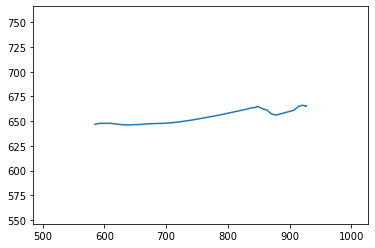

In [31]:

# in order to see the image from afar, i.e the whole drawing, we need to put limits
plt.xlim(min(df['X'])-100,max(df['X'])+100)
plt.ylim(min(df[' Y'])-100,max(df[' Y'])+100)
plt.plot(df['X'],df[' Y'])
# plt.scatter(df['X'],df[' Y'],df[' Time'])
plt.show()

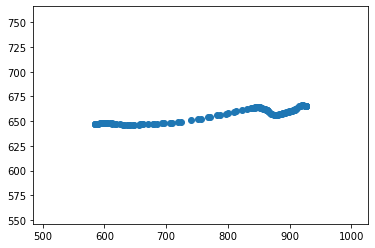

In [51]:
plt.xlim(min(df['X'])-100,max(df['X'])+100)
plt.ylim(min(df[' Y'])-100,max(df[' Y'])+100)
plt.scatter(df['X'],df[' Y'])
# plt.scatter(df['X'],df[' Y'],df[' Time'])
plt.show()

In [33]:
# x = df['X']
# y = df[' Y']

# fig = plt.figure()
# plt.xlim(float(df['X'].min())-100 , float(df['X'].max()) + 100)
# plt.ylim(float(df[' Y'].min())-100 , float(df[' Y'].max()) + 100)
# graph, = plt.plot([], [], 'o' ,markersize=8)
# plt.gca().invert_yaxis()
# def animate(i):
#     graph.set_data(x[:i+1], y[:i+1])
#     return graph

# ani = FuncAnimation(
# fig, animate, frames=len(df), interval=10)
# plt.show()

In [34]:
# plt.xlim(min(df['X'])-100,max(df['X'])+100)
# plt.ylim(min(df[' Time'])-100,max(df[' Time'])+100)
# # plt.plot(df['X'],df[' Y'])

# plt.scatter(df['X'],df[' Time'])

# plt.show()



In [35]:
# plt.scatter(df[' Y'],df[' Time'])
# # plt.scatter(df['X'],df[' Y'],df[' Time'])
# plt.show()


In [36]:
l=df['X'].min()

In [37]:
float(l)

584.653193209377

In [52]:
# function that imports each table from a specific folder and creates a data frame for each folder
def import_tables2(num_folder):
    main_df = {}
    for num_table in range (1,22):
        
        
#        print("table number:",num_table)
        print()
        f= open('task4_train'+'/'+num_folder+'/SimpleTest/'+str(num_table)+'.csv')
        df=pd.read_csv(f)
        df=df.dropna() # taking care of null values
        tempx=df['X']
        tempy=df[' Y']
        main_df[num_table]=df
        print()
        

    return main_df
    
 #   ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

In [39]:
df1=import_tables2('7554') # change name to folders
df2=import_tables2('7556')
df3=import_tables2('7557')
df4=import_tables2('7558')
df5=import_tables2('7559')
df6=import_tables2('7560')
df7=import_tables2('7561')
df8=import_tables2('7563')
df9=import_tables2('7569')
df10=import_tables2('7570')
df11=import_tables2('7571')
df12=import_tables2('7572')
df13=import_tables2('7573')
df14=import_tables2('7574')

In [40]:
df7[1][' Pressure'].min()

0.0732421875

In [41]:
df1[1]

,X,Y,Pressure,TiltX,TiltY,Time
0,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6099853
1,925.902760133965,665.541979,0.045884,-4917.0,669.0,00:12.6256038
2,926.692689687031,665.647303,0.082506,-4917.0,669.0,00:12.6445684
3,927.008661508257,665.647303,0.115953,-4917.0,669.0,00:12.6602735
4,927.324633329484,665.594641,0.140368,-4917.0,669.0,00:12.6838147
...,...,...,...,...,...,...
127,585.495784732648,647.004966,0.378408,-4510.0,1946.0,00:14.0316787
128,584.863841090195,646.846980,0.382803,-4510.0,1946.0,00:14.0472865
129,584.863841090195,646.846980,0.386954,-4510.0,1946.0,00:14.0629098
130,584.653193209377,646.741656,0.386954,-4501.0,1991.0,00:14.0785335


In [42]:
df8

{1:            X           Y   Pressure    TiltX    TiltY           Time
 0    498.465  618.640000   0.087891  12097.0  14143.0  00:04.1784296
 1    498.465  618.640000   0.092529  12097.0  14143.0  00:04.1909776
 2    499.605  618.766667   0.133057  12097.0  14143.0  00:04.1912197
 3   500.0325  619.020000   0.135986  12097.0  14143.0  00:04.2057425
 4    501.315  619.273333   0.137939  12097.0  14143.0  00:04.2204225
 ..       ...         ...        ...      ...      ...            ...
 88    734.73  591.026667   0.706543  10192.0  13845.0  00:05.2194664
 89    736.44  590.266667   0.708740  10192.0  13845.0  00:05.2200984
 90  737.1525  589.886667   0.710693  10192.0  13845.0  00:05.2534302
 91   739.005  589.000000   0.708252  10192.0  13845.0  00:05.2723964
 92    740.43  587.733333   0.680420  10192.0  13845.0  00:05.2796849
 
 [93 rows x 6 columns],
 2:            X           Y   Pressure    TiltX    TiltY           Time
 0   714.6375  467.146667   0.293701  11434.0  11410.0  00

In [53]:
# function for visualisation of each table in the specific folder
def show_draw(num_folder):
    for num_table in range (1,21):
        print()
        print("table number:",num_table)
        print()
        f= open('task4_train'+'/'+num_folder+'/SimpleTest/'+str(num_table)+'.csv')
        df=pd.read_csv(f)
        df=df.dropna()
#         tempx=df['X']
#         tempy=df[' Y']
#         change data from str to float
        df['X']=df['X'].astype(float)
        df[' Y']=df[' Y'].astype(float)
        plt.xlim(min(df['X'])-100,max(df['X'])+100)
        plt.ylim(min(df[' Y'])-100,max(df[' Y'])+100)
        plt.scatter(df['X'],df[' Y'])
#         plt.scatter(tempx,tempy)
    
        plt.show()
        print(df)

    
 #   ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))


table number: 1



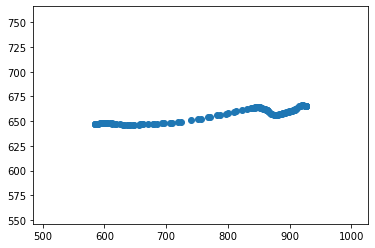

              X           Y   Pressure   TiltX   TiltY           Time
0    925.902760  665.541979   0.045884 -4917.0   669.0  00:12.6099853
1    925.902760  665.541979   0.045884 -4917.0   669.0  00:12.6256038
2    926.692690  665.647303   0.082506 -4917.0   669.0  00:12.6445684
3    927.008662  665.647303   0.115953 -4917.0   669.0  00:12.6602735
4    927.324633  665.594641   0.140368 -4917.0   669.0  00:12.6838147
..          ...         ...        ...     ...     ...            ...
127  585.495785  647.004966   0.378408 -4510.0  1946.0  00:14.0316787
128  584.863841  646.846980   0.382803 -4510.0  1946.0  00:14.0472865
129  584.863841  646.846980   0.386954 -4510.0  1946.0  00:14.0629098
130  584.653193  646.741656   0.386954 -4501.0  1991.0  00:14.0785335
131  584.653193  646.741656   0.389151 -4501.0  1991.0  00:14.0941464

[132 rows x 6 columns]

table number: 2



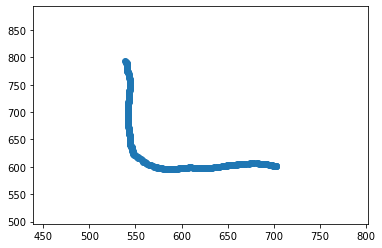

              X           Y   Pressure   TiltX   TiltY           Time
0    538.995265  793.141933   0.007797 -5564.0  -521.0  00:05.5315422
1    539.153251  792.246680   0.007797 -5564.0  -521.0  00:05.5471346
2    539.943181  789.929553   0.007797 -5564.0  -521.0  00:05.5627578
3    540.417138  789.034300   0.007797 -5564.0  -521.0  00:05.5784554
4    540.733110  788.139046   0.007797 -5564.0  -521.0  00:05.5941499
..          ...         ...        ...     ...     ...            ...
242  702.089387  601.873657   0.382315 -4986.0   230.0  00:08.3713049
243  702.773992  601.347038   0.374258 -4986.0   230.0  00:08.3713049
244  702.773992  601.347038   0.371084 -4986.0   230.0  00:08.3869325
245  702.773992  601.347038   0.367910 -4986.0   230.0  00:08.4025636
246  702.773992  601.347038   0.341299 -4986.0   230.0  00:08.4181763

[247 rows x 6 columns]

table number: 3



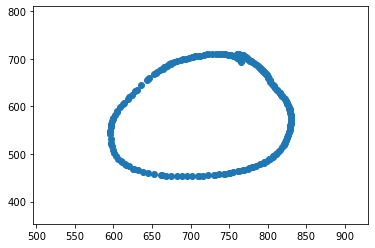

              X           Y   Pressure   TiltX   TiltY           Time
0    765.705047  694.400739   0.057603 -4398.0   693.0  00:07.3360831
1    763.703892  697.191824   0.060533 -4398.0   693.0  00:07.3516977
2    762.176695  699.561612   0.090806 -4398.0   693.0  00:07.3829451
3    759.806906  702.879316   0.154040 -4398.0   693.0  00:07.3986387
4    758.437695  704.143204   0.176257 -4398.0   693.0  00:07.4141981
..          ...         ...        ...     ...     ...            ...
223  764.125188  709.040767   0.472160 -3801.0   841.0  00:09.7686524
224  762.176695  709.462063   0.464347 -3801.0   841.0  00:09.7998921
225  761.544751  709.620049   0.452628 -3801.0   841.0  00:09.7998921
226  761.228779  709.725372   0.446525 -3801.0   841.0  00:09.8155120
227  759.754244  710.199330   0.222889 -3801.0   841.0  00:09.8155120

[228 rows x 6 columns]

table number: 4



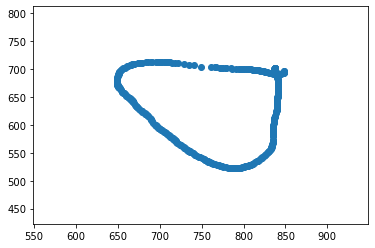

              X           Y   Pressure   TiltX   TiltY           Time
0    847.805058  696.243908   0.058579 -4762.0   723.0  00:07.4715108
1    848.068368  696.085922   0.061509 -4762.0   723.0  00:07.4871337
2    848.437002  695.769950   0.065415 -4762.0   723.0  00:07.5028896
3    848.437002  695.769950   0.086412 -4762.0   723.0  00:07.5183749
4    848.437002  695.769950   0.159655 -4762.0   723.0  00:07.5339944
..          ...         ...        ...     ...     ...            ...
404  837.220002  702.247373   0.719234 -4148.0   889.0  00:11.9926556
405  837.220002  702.510683   0.714351 -4148.0   889.0  00:12.0239232
406  837.220002  702.510683   0.708492 -4148.0   889.0  00:12.0395151
407  837.220002  701.931401   0.628656 -4148.0   889.0  00:12.0551384
408  836.166763  696.191246   0.293935 -4148.0   889.0  00:12.0551384

[409 rows x 6 columns]

table number: 5



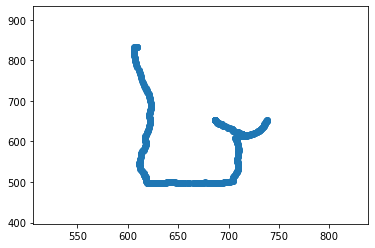

              X           Y   Pressure   TiltX   TiltY           Time
0    608.351080  833.323017   0.107164 -3848.0  -644.0  00:02.7272871
1    608.877700  833.165031   0.107164 -3848.0  -644.0  00:02.7429109
2    608.877700  833.165031   0.099107 -3848.0  -644.0  00:02.7585749
3    609.035685  833.323017   0.107652 -3959.0  -670.0  00:02.7741475
4    608.719714  833.586326   0.129381 -4059.0  -694.0  00:02.7898665
..          ...         ...        ...     ...     ...            ...
498  686.132810  654.061670   0.507561 -3717.0  1573.0  00:16.4421005
499  686.132810  654.061670   0.507561 -3717.0  1573.0  00:16.4578282
500  686.132810  654.061670   0.507561 -3717.0  1573.0  00:16.4733589
501  686.132810  654.061670   0.490227 -3717.0  1573.0  00:16.4891290
502  686.448782  653.903684   0.478019 -3717.0  1573.0  00:16.5046050

[503 rows x 6 columns]

table number: 6



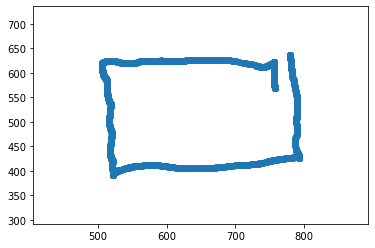

               X           Y   Pressure   TiltX   TiltY           Time
0     758.016399  569.381222   0.088853 -4282.0  2245.0  00:02.7042668
1     758.069061  569.170574   0.108629 -4282.0  2245.0  00:02.7198912
2     758.069061  569.170574   0.141833 -4011.0  2058.0  00:02.7355150
3     758.069061  569.170574   0.170397 -3961.0  2025.0  00:02.7511401
4     758.069061  569.170574   0.186267 -3961.0  2025.0  00:02.7667508
...          ...         ...        ...     ...     ...            ...
1104  779.291835  635.577318   0.761227 -3373.0  1415.0  00:15.7094726
1105  779.291835  635.577318   0.754391 -3373.0  1415.0  00:15.7251581
1106  779.291835  635.577318   0.745113 -3373.0  1415.0  00:15.7251581
1107  779.291835  635.577318   0.737301 -3373.0  1415.0  00:15.7408486
1108  779.291835  635.577318   0.711910 -3373.0  1415.0  00:15.7564239

[1109 rows x 6 columns]

table number: 7



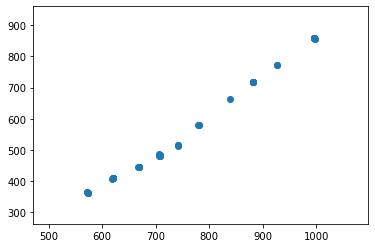

             X           Y   Pressure   TiltX   TiltY           Time
0   571.329715  364.894792   0.190661 -3352.0  2845.0  00:02.2408653
1   571.908996  364.578820   0.202380 -3352.0  2845.0  00:02.2564937
2   572.909574  363.894214   0.237781 -3352.0  2845.0  00:02.2721532
3   573.067560  363.736228   0.239979 -3352.0  2845.0  00:02.2878658
4   573.067560  363.736228   0.230701 -3352.0  2845.0  00:02.2878658
5   619.778727  409.710128   0.260487 -4405.0  2788.0  00:03.0222758
6   620.200023  409.288832   0.276600 -4405.0  2788.0  00:03.0378670
7   620.200023  409.288832   0.268055 -4276.0  2682.0  00:03.0535995
8   620.200023  409.288832   0.277577 -4102.0  2544.0  00:03.0691185
9   620.200023  409.288832   0.282460 -4102.0  2544.0  00:03.0847513
10  619.726065  408.972861   0.282460 -4102.0  2544.0  00:03.1004349
11  618.936136  408.867537   0.207263 -4102.0  2544.0  00:03.1159844
12  667.806444  446.731493   0.073472 -3727.0  2112.0  00:03.9817503
13  667.806444  446.731493   0.073

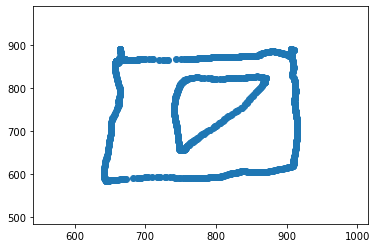

               X           Y   Pressure   TiltX   TiltY           Time
0     910.472803  888.302113   0.094224 -3875.0  -351.0  00:05.8895936
1     910.472803  888.302113   0.099107 -3875.0  -351.0  00:05.9052263
2     910.472803  888.302113   0.123278 -3875.0  -351.0  00:05.9208500
3     910.472803  888.302113   0.129137 -3875.0  -351.0  00:05.9364735
4     909.840859  888.460099   0.137926 -3875.0  -351.0  00:05.9521633
...          ...         ...        ...     ...     ...            ...
1178  870.186396  822.264003   0.685542 -3761.0   823.0  00:23.7650398
1179  870.449706  822.264003   0.685542 -3761.0   823.0  00:23.7650398
1180  870.449706  822.264003   0.682368 -3761.0   823.0  00:23.7806749
1181  870.449706  822.264003   0.673579 -3761.0   823.0  00:23.7806749
1182  870.713015  822.369327   0.644038 -3761.0   823.0  00:23.7806749

[1183 rows x 6 columns]

table number: 9



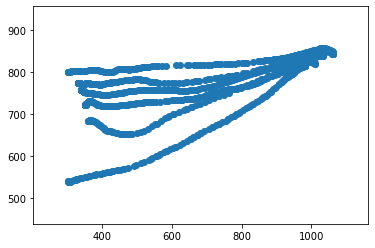

                X           Y   Pressure   TiltX   TiltY           Time
0     1059.927474  842.854833   0.076402 -4257.0   988.0  00:04.5448411
1     1059.927474  842.854833   0.076402 -4257.0   988.0  00:04.5604847
2     1060.559418  842.960157   0.083482 -4257.0   988.0  00:04.5761906
3     1061.138700  842.696847   0.097642 -4257.0   988.0  00:04.5918112
4     1061.402009  842.591523   0.132555 -4257.0   988.0  00:04.6073533
...           ...         ...        ...     ...     ...            ...
1096   302.964315  537.994688   0.577630 -3054.0  1275.0  00:24.8422234
1097   302.753667  538.100012   0.550042 -3054.0  1275.0  00:24.8578573
1098   302.490357  538.257997   0.534417 -3054.0  1275.0  00:24.8578573
1099   301.911075  538.626631   0.482658 -3054.0  1275.0  00:24.8734813
1100   301.911075  538.626631   0.441154 -3054.0  1275.0  00:24.8734813

[1101 rows x 6 columns]

table number: 10



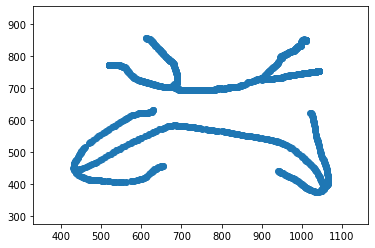

                X           Y   Pressure   TiltX   TiltY           Time
0      946.388267  798.408130   0.186999 -4447.0  1009.0  00:03.4787405
1      946.862224  796.512299   0.190906 -4447.0  1009.0  00:03.4943781
2      946.388267  794.774454   0.190417 -4199.0   927.0  00:03.5099814
3      945.598337  792.404666   0.223133 -4199.0   927.0  00:03.5256250
4      944.439774  789.613581   0.266835 -4199.0   927.0  00:03.5412356
...           ...         ...        ...     ...     ...            ...
1224  1050.290334  383.905763   0.566400  -535.0  1786.0  00:36.6884413
1225  1050.027024  383.695115   0.563470  -535.0  1786.0  00:36.6884413
1226  1050.027024  383.695115   0.555657  -535.0  1786.0  00:36.7040728
1227  1049.711052  383.589791   0.532219  -535.0  1786.0  00:36.7197060
1228  1048.657813  383.853101   0.286366  -535.0  1786.0  00:36.7197060

[1229 rows x 6 columns]

table number: 11



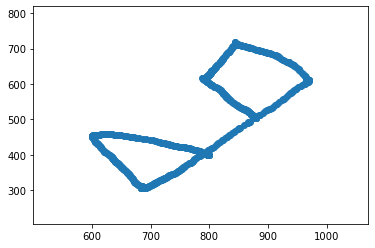

              X           Y   Pressure   TiltX   TiltY           Time
0    968.558956  611.089502   0.113756 -4045.0  1362.0  00:08.4231753
1    968.874928  611.142164   0.115709 -4045.0  1362.0  00:08.4388114
2    970.138815  611.036840   0.137194 -4045.0  1362.0  00:08.4544339
3    970.402125  611.036840   0.207263 -4045.0  1362.0  00:08.4757771
4    970.402125  611.036840   0.296376 -4045.0  1362.0  00:08.4914766
..          ...         ...        ...     ...     ...            ...
817  879.033607  505.607576   0.625727 -3260.0  1718.0  00:27.5996193
818  879.191593  505.449590   0.608148 -3260.0  1718.0  00:27.6153125
819  879.454902  505.186280   0.596918 -3260.0  1718.0  00:27.6153125
820  879.454902  505.186280   0.586175 -3260.0  1718.0  00:27.6308769
821  879.454902  505.186280   0.549798 -3260.0  1718.0  00:27.6308769

[822 rows x 6 columns]

table number: 12



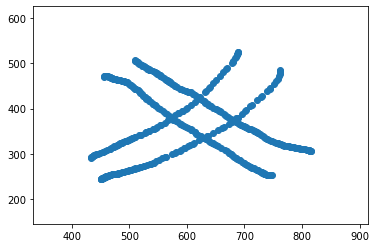

              X           Y   Pressure   TiltX   TiltY           Time
0    688.818570  526.514378   0.071031 -4515.0  2197.0  00:18.1988702
1    688.660584  525.724449   0.078355 -4515.0  2197.0  00:18.2144819
2    688.291951  523.670632   0.089586 -4515.0  2197.0  00:18.2302213
3    687.607345  520.405590   0.152819 -4515.0  2197.0  00:18.2458102
4    686.764753  517.719829   0.191394 -4515.0  2197.0  00:18.2613566
..          ...         ...        ...     ...     ...            ...
522  739.216076  253.567387   0.705806 -2757.0 -1514.0  00:27.5447703
523  741.164569  253.040767   0.697749 -2757.0 -1514.0  00:27.5603600
524  744.008315  252.882781   0.682612 -2757.0 -1514.0  00:27.5764537
525  745.324864  252.988105   0.672847 -2757.0 -1514.0  00:27.5920828
526  747.852639  253.304077   0.630610 -2757.0 -1514.0  00:27.6077052

[527 rows x 6 columns]

table number: 13



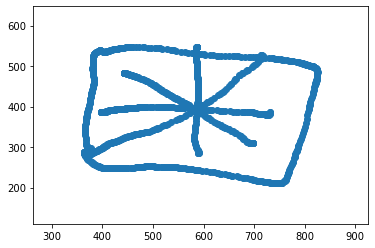

               X           Y   Pressure   TiltX   TiltY           Time
0     713.411710  527.672941   0.290761 -4798.0  2043.0  00:13.4325736
1     713.780344  527.462294   0.295644 -4798.0  2043.0  00:13.4481964
2     714.780922  526.777688   0.295644 -4798.0  2043.0  00:13.4638099
3     716.782076  524.934519   0.208728 -4798.0  2043.0  00:13.4794442
4     717.098048  523.775956   0.208728 -4798.0  2043.0  00:13.4950665
...          ...         ...        ...     ...     ...            ...
1198  367.159256  291.010047   0.733639 -1988.0  1259.0  00:35.3933225
1199  371.372214  293.379836   0.685542 -1988.0  1259.0  00:35.3933225
1200  372.583439  294.064442   0.667231 -1988.0  1259.0  00:35.4089803
1201  376.480425  296.118258   0.608392 -1988.0  1259.0  00:35.4089803
1202  377.849636  296.750202   0.558099 -1988.0  1259.0  00:35.4089803

[1203 rows x 6 columns]

table number: 14



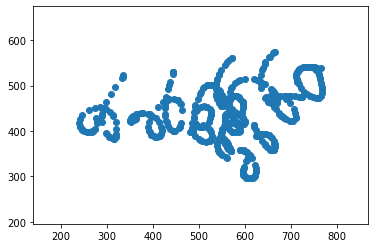

              X           Y   Pressure   TiltX   TiltY           Time
0    764.441159  538.415983   0.198962 -3545.0  -438.0  00:02.2203548
1    756.910498  539.363899   0.225086 -3545.0  -438.0  00:02.2359807
2    750.959695  539.995842   0.217517 -3545.0  -438.0  00:02.2516036
3    744.903569  540.838434   0.215076 -3545.0  -438.0  00:02.2673119
4    738.742118  541.154406   0.221912 -3545.0  -438.0  00:02.2673119
..          ...         ...        ...     ...     ...            ...
536  274.842822  405.233861   0.500725  -929.0  1642.0  00:12.3433697
537  278.318513  418.136043   0.466545  -943.0  1634.0  00:12.3588412
538  278.371175  420.295184   0.459709  -943.0  1634.0  00:12.3588412
539  277.686569  426.930592   0.437247  -943.0  1634.0  00:12.3588412
540  277.159949  429.089733   0.400870  -943.0  1634.0  00:12.3588412

[541 rows x 6 columns]

table number: 15



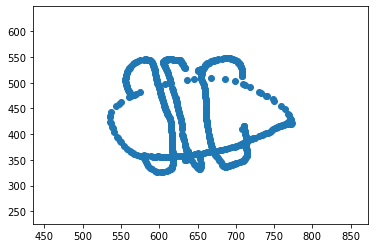

              X           Y   Pressure   TiltX   TiltY           Time
0    767.864188  418.978635   0.045884 -5178.0  2279.0  00:03.4174525
1    768.759441  418.820649   0.045884 -5178.0  2279.0  00:03.4330757
2    769.391385  418.820649   0.060044 -5178.0  2279.0  00:03.4488039
3    770.707934  418.820649   0.118151 -5178.0  2279.0  00:03.4644607
4    771.181892  419.136621   0.180407 -5178.0  2279.0  00:03.4799573
..          ...         ...        ...     ...     ...            ...
644  580.176926  353.835778   0.632074 -3891.0  1408.0  00:18.0949448
645  580.071602  354.467721   0.632074 -3891.0  1408.0  00:18.1105679
646  579.966278  356.100243   0.632074 -3891.0  1408.0  00:18.1105679
647  579.913616  356.942834   0.629877 -3891.0  1408.0  00:18.1419729
648  579.650306  359.575933   0.616449 -3891.0  1408.0  00:18.1419729

[649 rows x 6 columns]

table number: 16



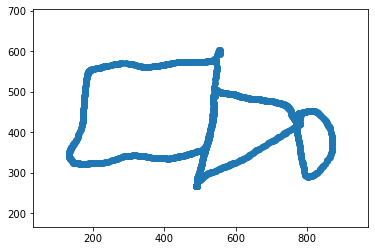

               X           Y   Pressure   TiltX   TiltY           Time
0     543.471533  576.753898   0.045884 -4747.0   -54.0  00:02.0961795
1     544.630096  574.752743   0.124010 -4747.0   -54.0  00:02.1118074
2     545.735997  571.224391   0.231922 -4747.0   -54.0  00:02.1274907
3     546.473265  561.060631   0.278065 -4747.0   -54.0  00:02.1430894
4     545.946645  552.371405   0.313222 -4747.0   -54.0  00:02.1430894
...          ...         ...        ...     ...     ...            ...
1083  775.184201  445.204296   0.684810 -3750.0   525.0  00:29.5969320
1084  776.184779  446.046888   0.684810 -3755.0   445.0  00:29.5969320
1085  776.500751  446.310197   0.684810 -3755.0   445.0  00:29.6125461
1086  777.396004  446.836817   0.672847 -3758.0   405.0  00:29.6281693
1087  777.869962  447.152789   0.660639 -3758.0   405.0  00:29.6438097

[1088 rows x 6 columns]

table number: 17



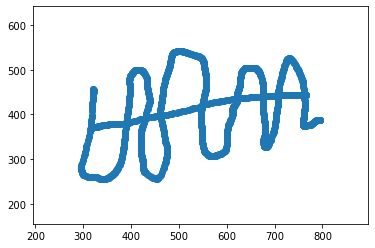

               X           Y   Pressure   TiltX   TiltY           Time
0     319.710821  457.790507   0.306142 -4167.0  -398.0  00:11.1068854
1     320.500751  457.369211   0.311025 -4167.0  -398.0  00:11.1234497
2     321.869962  454.788775   0.286610 -4175.0   -12.0  00:11.1391633
3     321.869962  452.050352   0.302968 -4166.0   415.0  00:11.1547220
4     321.501328  450.417831   0.304921 -4161.0   504.0  00:11.1547220
...          ...         ...        ...     ...     ...            ...
1453  765.336413  442.623860   0.665522 -1392.0  -806.0  00:31.7422388
1454  765.336413  442.623860   0.663569 -1392.0  -806.0  00:31.7578625
1455  765.863033  442.676522   0.652827 -1392.0  -806.0  00:31.7735962
1456  766.442314  442.781845   0.643549 -1392.0  -806.0  00:31.7735962
1457  766.442314  442.781845   0.620111 -1392.0  -806.0  00:31.7735962

[1458 rows x 6 columns]

table number: 18



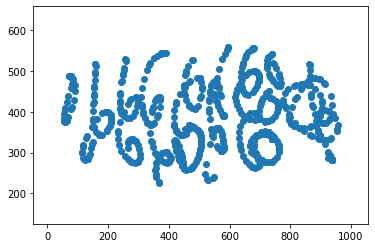

              X           Y   Pressure   TiltX   TiltY           Time
0    740.163991  541.891673   0.326406 -3704.0   449.0  00:27.1614355
1    738.952766  541.365054   0.346670 -3704.0   449.0  00:27.1771579
2    733.001963  537.099434   0.302480 -3704.0   449.0  00:27.1926912
3    728.104400  532.728491   0.304921 -3704.0   449.0  00:27.2083235
4    724.786696  526.040420   0.337636 -3704.0   449.0  00:27.2246921
..          ...         ...        ...     ...     ...            ...
713  936.593140  282.794780   0.696040 -2006.0  1756.0  00:45.4181263
714  936.066520  283.321400   0.676509 -1992.0  1774.0  00:45.4337880
715  930.010394  286.849752   0.451652 -1931.0  1841.0  00:45.4337880
716  928.851830  287.218385   0.413565 -1914.0  1859.0  00:45.4493780
717  925.060169  287.797667   0.302235 -1883.0  1890.0  00:45.4493780

[718 rows x 6 columns]

table number: 19



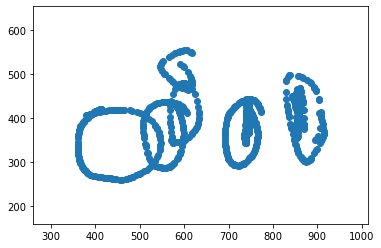

              X           Y   Pressure   TiltX   TiltY           Time
0    395.702044  414.660353   0.117174 -1110.0   385.0  00:06.9130198
1    399.862340  417.293452   0.123278 -1110.0   385.0  00:06.9442622
2    404.759903  419.241945   0.127184 -1117.0   362.0  00:06.9598894
3    411.237325  420.505832   0.035874 -1147.0   246.0  00:06.9755032
4    411.605959  420.663818   0.053452 -1147.0   246.0  00:06.9911299
..          ...         ...        ...     ...     ...            ...
872  909.630211  394.912115   0.513909 -3326.0  2481.0  00:44.4374619
873  907.892366  401.494861   0.491936 -3326.0  2481.0  00:44.4374619
874  907.260423  403.706664   0.463859 -3326.0  2481.0  00:44.4530980
875  905.101282  410.552720   0.288075 -3326.0  2481.0  00:44.4530980
876  904.206028  412.869846   0.161852 -3326.0  2481.0  00:44.4530980

[877 rows x 6 columns]

table number: 20



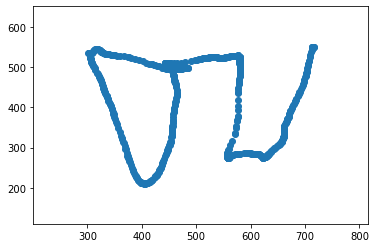

              X           Y   Pressure   TiltX   TiltY           Time
0    712.411133  550.422913   0.290761 -4617.0  2397.0  00:02.4825431
1    712.727105  550.580898   0.295644 -4617.0  2397.0  00:02.4981649
2    713.517034  550.896870   0.295644 -4617.0  2397.0  00:02.4981649
3    713.938330  550.949532   0.278798 -4617.0  2397.0  00:02.5137802
4    715.886823  550.422913   0.232654 -4617.0  2397.0  00:02.5343289
..          ...         ...        ...     ...     ...            ...
714  479.855873  496.813027   0.681147 -3819.0  1666.0  00:15.5794018
715  482.015013  497.181661   0.660395 -3769.0  1638.0  00:15.5794018
716  482.488971  497.286985   0.652827 -3769.0  1638.0  00:15.5950274
717  484.174154  498.024252   0.603265 -3769.0  1638.0  00:15.5950274
718  484.174154  498.024252   0.589837 -3769.0  1638.0  00:15.6106472

[719 rows x 6 columns]


In [54]:
show_draw('7554')
# show_draw('7556')
# show_draw('7557')
# show_draw('7558')
# show_draw('7559')


Strating to build the algorytm:

points of thought:

* minimun pressure might hint if the child raised his hand during the drawing. we will make a thresold depending on patterns we will try to detect.
להמשיך עם הרעיון הזה ,למצוא את הממוצע של ערך מינימלי של לחץ בכל הטבלאות בתיקייה אחת, ואז לעשות  לפי זה את הטווח

* x, y and time table - make a column of the diferrences, so we can try to find a pattern - when a line is drawn, when we are moving on to the next line and etc

* make a velocity column?

In [45]:
import statistics

In [46]:
def is_raise_hand(num_folder):
    for num_table in range (1,21):
        f= open('task4_train'+'/'+num_folder+'/SimpleTest/'+str(num_table)+'.csv')
        df=pd.read_csv(f)
        min_table=min(df[' Pressure'])
        print(min_table)
#         print(statistics.fmean(df[' Pressure']))
#         print(statistics.fmean((min(df[' Pressure']))))



In [ ]:
# ACCURATE
# check how many time differences are bigger than 0.04 - if it's bigger , it's a hand raise , because the time that takes for a human hand to raise hand can't be less than 0.04 nano seconds. 
def is_raise_hand_accurate(num_folder):
    .shift(periods = 1)

In [47]:
folder1=is_raise_hand('7554') # change name to folders
folder2=is_raise_hand('7556')
#df3=import_tables2('7557')
#df4=import_tables2('7558')
#df5=import_tables2('7559')

0.0458838790655136
0.007797360420227
0.0576028078794479
0.0585793852806091
0.0610208287835121
0.0888532847166061
0.0295262075960636
0.0458838790655136
0.0458838790655136
0.0139009691774845
0.0439307242631912
0.0668802931904793
0.0139009691774845
0.198962390422821
0.0305027849972248
0.0458838790655136
0.0610208287835121
0.0859235525131226
0.0358739607036114
0.0351415276527405
0.191638052463531
0.0305027849972248
0.250720977783203
0.176012814044952
0.35399404168129
0.18211641907692
0.0307469293475151
0.122789345681667
0.0341649502515793
0.0095063708722591
0.0798199400305748
0.107164107263088
0.0917830169200897
0.0112153813242912
0.0139009691774845
0.0358739607036114
0.166979476809502
0.0139009691774845
0.0305027849972248
0.0305027849972248


# change time columns from str to date time/ float - it is recomended to convert to date time! more manipulations

In [48]:
def str_to_float(time_column):
    convert_float=0.0
    for time in time_column:
        flag_dot=False
        flag_colon=False
        flag_not_zero=False
        for i in range(1,len(time)):
# mabye not needed
             if(time[i] ==':'):
                    flag_colon=True
             elif(time[i] == "."):
                flag_dot=True
                convert_float=float(convert_float)
             elif time[i]!=0 & (flag_dot is not True) :
                flag_not_zero=True # we already found a number that isn't 0
                convert_float=(convert_float*10)+int(time[i])
             elif time[i]!=0 & (flag_dot is True):
                    count=1
                    convert_float=convert_float+(float(time[i])/(10*count)) # add fractions
                    count=count+1
             elif time[i]==0 & (flag_not_zero is True):# now we can't ignore the zeros  
                 convert_float=(convert_float*10)+int(time[i])
    return convert_float

In [49]:
str_to_float(df1[1][' Time'])

inf

In [50]:
print(format(432.456, ".2f").atype)

AttributeError: 'str' object has no attribute 'atype'

In [ ]:
for time in df1[1][' Time']:
    for i in range(1,len(time)):
        count=1
        
        print(float(i)+(float(time[i])/(10*count)))
        count=count+1

In [ ]:
# import datetime as datetime
# date_time_obj = datetime.strptime(date_time_str, '%H:%M:%S')

# # a=datetime.datetime.time(df[' Time'][1])
# # a


In [ ]:
# animation function - recreation of the drawing

x = df['X']
y = df[' Y']

fig = plt.figure()
plt.xlim(df['X'].min()-100 , df['X'].max() + 100)
plt.ylim(df[' Y'].min()-100 , df[' Y'].max() + 100)
graph, = plt.plot([], [], 'o' ,markersize=8)
plt.gca().invert_yaxis()
def animate(i):
    graph.set_data(x[:i+1], y[:i+1])
    return graph

ani = FuncAnimation(
fig, animate, frames=len(df), interval=10)
plt.show()

# טיוטה

In [ ]:
#df = pd.read_csv("task4_train"

In [ ]:

# # Import Module
# import os
  
# # Folder Path
# path = "genre_classification.ipynb"
  
# # Change the directory
# os.chdir(path)

In [ ]:
from pathlib import Path
entries=Path('genre_classification.ipynb')

In [ ]:
# for entry in entries.iterdir():
#     print(entry.name)


In [ ]:
from pathlib import Path

entries = Path('Desktop/semB_project/task4_train/')
for entry in entries.iterdir():
    print(entry.name)


In [ ]:
for folder in path:
    os.chdir(folder)
             
                

In [ ]:
# Read text File 
def read_text_file(file_path):
    with open(file_path, 'r') as f:
        print(f.read())

In [ ]:
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        file_path = f"{path}\{file}"

In [ ]:
# call read text file function
        read_text_file(file_path)